<a href="https://colab.research.google.com/github/kotharisanjana/CMPE255_DataMining_Fall2022/blob/main/Pycaret_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installations

In [ ]:
!pip install pycaret --user
!pip install Jinja2==2.11.3
!pip install markupsafe==2.0.1
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Kaggle API credentials

In [ ]:
!gdown 12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD

Downloading...
From: https://drive.google.com/uc?id=12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 124kB/s]


## Imports

In [ ]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *
import pandas_profiling as pp 

## Download dataset

In [ ]:
od.download('https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set')

100%|██████████| 19.4M/19.4M [00:01<00:00, 11.8MB/s]


In [ ]:
df = pd.read_csv('/content/electric-power-consumption-data-set/household_power_consumption.txt', sep = ';')

## EDA

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
df.replace(['?', 'nan', np.nan], -1, inplace=True) 
num_vars= ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in num_vars:
    df[i] = pd.to_numeric(df[i])

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.065431e+00,1.096473e-01,2.378124e+02,4.557309e+00,1.095360e+00,1.269746e+00,6.365079e+00
std,1.076084e+00,1.677998e-01,2.708063e+01,4.460594e+00,6.118946e+00,5.791112e+00,8.425087e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,3.040000e-01,4.600000e-02,2.388900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.780000e-01,1.000000e-01,2.409600e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
eq1 = (df['Global_active_power']*1000/60) 
eq2 = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['power_consumption'] = eq1 - eq2

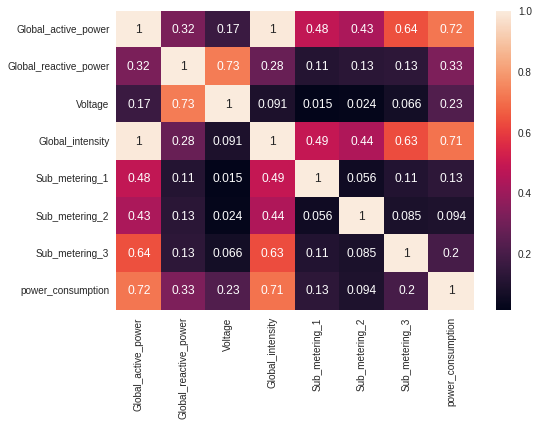

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [ ]:
#df_s = df.sample(frac = 0.5, random_state = 123)
train = df.sample(frac = 0.8, random_state = 786)
test = df.drop(train.index)

print('Data for Modeling: ' + str(train.shape))
print('Unseen Data For Predictions: ' + str(test.shape))

Data for Modeling: (1660207, 10)
Unseen Data For Predictions: (415052, 10)


## Set up environment

In [ ]:
regression = setup(train, \
                  session_id = 1, \
                  target = 'power_consumption', \
                  ignore_features = ['Date', 'Time'], \
                  #normalize = True, \
                  feature_selection = True, \
                  use_gpu =  True, \
                  fold = 5
                  )

,Description,Value
0,session_id,1
1,Target,power_consumption
2,Original Data,"(1660207, 10)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1162144, 6)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Date', 'Time'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='power_consumption',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerica...
                ('fix_perfect', Remove_100(target='power_consumption')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select',
      

## Model Selection


In [ ]:
models()

INFO:logs:gpu_param set to True


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## Model creation

In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4267,0.4580,0.6767,0.9953,0.0845,0.0797
1,0.4245,0.4521,0.6724,0.9953,0.0837,0.0783
2,0.4268,0.4553,0.6748,0.9953,0.0846,0.0794
3,0.4245,0.4537,0.6736,0.9953,0.0841,0.0798
4,0.4269,0.4570,0.6760,0.9953,0.0843,0.0798
Mean,0.4259,0.4552,0.6747,0.9953,0.0842,0.0794
Std,0.0011,0.0021,0.0016,0.0000,0.0003,0.0006


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
dt = create_model('dt', fold = 3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4168,0.6916,0.8316,0.9929,0.0830,0.0658
1,0.4150,0.6760,0.8222,0.9930,0.0827,0.0654
2,0.4164,0.6832,0.8265,0.9929,0.0828,0.0656
Mean,0.4161,0.6836,0.8268,0.9930,0.0828,0.0656
Std,0.0008,0.0064,0.0039,0.0001,0.0001,0.0002


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4134,0.5158,0.7182,0.9947,0.0892,0.0821
1,0.4130,0.5087,0.7132,0.9948,0.0892,0.0810
2,0.4118,0.5149,0.7176,0.9947,0.0893,0.0814
3,0.4116,0.5136,0.7166,0.9947,0.0884,0.0814
4,0.4134,0.5167,0.7188,0.9947,0.0908,0.0851
Mean,0.4126,0.5139,0.7169,0.9947,0.0894,0.0822
Std,0.0008,0.0028,0.0020,0.0000,0.0008,0.0015


INFO:logs:create_model_container: 5
INFO:logs:master_model_container: 5
INFO:logs:display_container: 6
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


## Model tuning

In [ ]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4267,0.4580,0.6767,0.9953,0.0845,0.0797
1,0.4245,0.4521,0.6724,0.9953,0.0837,0.0783
2,0.4268,0.4553,0.6748,0.9953,0.0846,0.0794
3,0.4245,0.4537,0.6736,0.9953,0.0841,0.0798
4,0.4269,0.4570,0.6760,0.9953,0.0843,0.0798
Mean,0.4259,0.4552,0.6747,0.9953,0.0842,0.0794
Std,0.0011,0.0021,0.0016,0.0000,0.0003,0.0006


INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:tune_model() succesfully completed......................................


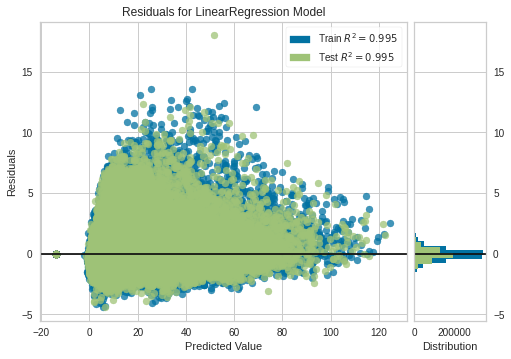

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lr, plot = 'residuals')

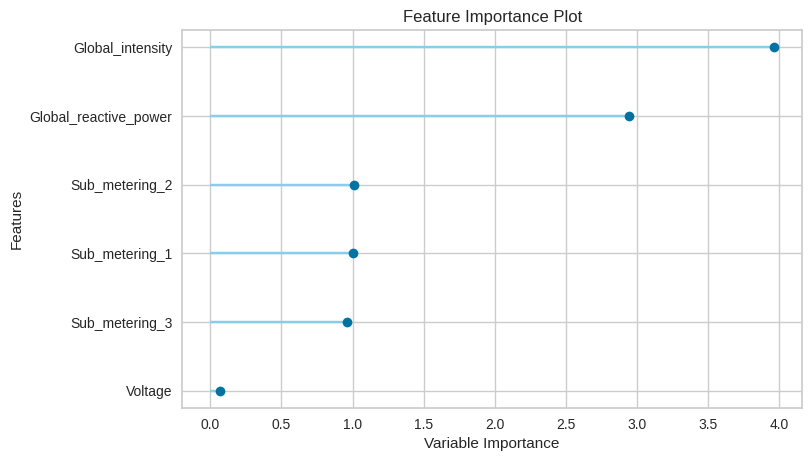

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lr, plot = 'feature')

## Ensemble

In [ ]:
bagged_dt = ensemble_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3444,0.4137,0.6432,0.9958,0.0679,0.0572
1,0.3447,0.4163,0.6452,0.9957,0.0681,0.0562
2,0.3457,0.4251,0.6520,0.9956,0.0686,0.0572
3,0.3448,0.4234,0.6507,0.9956,0.0684,0.0572
4,0.3457,0.4168,0.6456,0.9957,0.0685,0.0574
Mean,0.3451,0.4191,0.6473,0.9957,0.0683,0.0570
Std,0.0006,0.0044,0.0034,0.0001,0.0003,0.0004


INFO:logs:create_model_container: 6
INFO:logs:master_model_container: 6
INFO:logs:display_container: 7
INFO:logs:BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random

In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3570,0.4563,0.6755,0.9953,0.0725,0.0597
1,0.3583,0.4677,0.6839,0.9952,0.0727,0.0589
2,0.3596,0.4783,0.6916,0.9951,0.0728,0.0594
3,0.3586,0.4823,0.6945,0.9950,0.0732,0.0594
4,0.3606,0.4770,0.6907,0.9951,0.0731,0.0600
Mean,0.3588,0.4724,0.6872,0.9951,0.0729,0.0595
Std,0.0012,0.0093,0.0068,0.0001,0.0002,0.0004


INFO:logs:create_model_container: 7
INFO:logs:master_model_container: 7
INFO:logs:display_container: 8
INFO:logs:AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                 

## Prediction on test set


In [ ]:
predict_model(lr, data = test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.4255,0.448,0.6693,0.9954,0.0837,0.079


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,Label
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667,53.926155
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,39.666667,39.145191
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,43.133333,43.292751
14,16/12/2006,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0,49.566667,50.768768
15,16/12/2006,17:39:00,3.384,0.282,237.14,14.2,0.0,0.0,17.0,39.400000,38.832794
...,...,...,...,...,...,...,...,...,...,...,...
2075241,26/11/2010,20:45:00,0.972,0.092,238.32,4.0,0.0,2.0,0.0,14.200000,13.401837
2075242,26/11/2010,20:46:00,0.908,0.000,238.53,3.8,0.0,1.0,0.0,14.133333,13.901013
2075248,26/11/2010,20:52:00,0.946,0.000,239.05,4.0,0.0,0.0,0.0,15.766667,15.734878
2075252,26/11/2010,20:56:00,0.942,0.000,239.41,4.0,0.0,0.0,0.0,15.700000,15.758164


In [ ]:
predict_model(bagged_dt, data = test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=1,
                              

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.339,0.3844,0.62,0.996,0.0669,0.056


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,Label
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667,53.636667
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,39.666667,39.320000
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,43.133333,43.569999
14,16/12/2006,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0,49.566667,50.653333
15,16/12/2006,17:39:00,3.384,0.282,237.14,14.2,0.0,0.0,17.0,39.400000,39.243333
...,...,...,...,...,...,...,...,...,...,...,...
2075241,26/11/2010,20:45:00,0.972,0.092,238.32,4.0,0.0,2.0,0.0,14.200000,14.190000
2075242,26/11/2010,20:46:00,0.908,0.000,238.53,3.8,0.0,1.0,0.0,14.133333,14.333333
2075248,26/11/2010,20:52:00,0.946,0.000,239.05,4.0,0.0,0.0,0.0,15.766667,15.905555
2075252,26/11/2010,20:56:00,0.942,0.000,239.41,4.0,0.0,0.0,0.0,15.700000,15.170000


In [ ]:
predict_model(boosted_dt, data = test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=1,
                  

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.3516,0.4392,0.6628,0.9955,0.0713,0.0582


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,Label
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667,53.733334
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,39.666667,39.133335
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,43.133333,43.599998
14,16/12/2006,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0,49.566667,50.466667
15,16/12/2006,17:39:00,3.384,0.282,237.14,14.2,0.0,0.0,17.0,39.400000,39.200001
...,...,...,...,...,...,...,...,...,...,...,...
2075241,26/11/2010,20:45:00,0.972,0.092,238.32,4.0,0.0,2.0,0.0,14.200000,13.900000
2075242,26/11/2010,20:46:00,0.908,0.000,238.53,3.8,0.0,1.0,0.0,14.133333,14.433333
2075248,26/11/2010,20:52:00,0.946,0.000,239.05,4.0,0.0,0.0,0.0,15.766667,16.266666
2075252,26/11/2010,20:56:00,0.942,0.000,239.41,4.0,0.0,0.0,0.0,15.700000,14.733334
